In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#Assumed Values of Bo and Rp
#Since we are talking about an undersaturated reservoir and we know that during undersaturated reservoir Rp = Rsi,
# Value of Rp will be constant Rp = 112,
#For the Bo values we have assumed a set of values and then using Linear Regression Model obtained the accurate values for,
#our data


pressure= np.arange(5000,3900,-100)
Bo= np.array([1.078,1.07826,1.07832,1.07842,1.07850,1.07854,1.07860,1.07877,1.07880,1.07883,1.07891])
Rp=[]
for i in range(1,12):
    rp=112
    Rp.append(rp)

In [7]:
len(pressure)
len(Bo)
len(Rp)

11

In [60]:
df=pd.DataFrame({'Pressure': pressure,'Bo': Bo,'Prod_GOR': Rp})

In [61]:
df

,Pressure,Bo,Prod_GOR
0,5000,1.07800,112
1,4900,1.07826,112
2,4800,1.07832,112
3,4700,1.07842,112
4,4600,1.07850,112
5,4500,1.07854,112
6,4400,1.07860,112
7,4300,1.07877,112
8,4200,1.07880,112
9,4100,1.07883,112


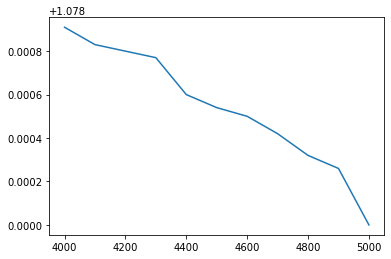

In [37]:
# Assumed Bo Values
plt.plot(df['Pressure'],df['Bo'])


In [40]:
p= df['Pressure']
b= df['Bo']

In [41]:
def linear(p,m,c):
    return m*p+c
    

In [42]:
from scipy.optimize import curve_fit

popt,pcov = curve_fit(linear,p,b)

In [43]:
m,c = popt

In [44]:
m

-8.245454067406768e-07

In [45]:
c

1.082251363421244

In [53]:
linear(m,c,4000)

3999.9999991076347

In [54]:
p_forecast = np.arange(5000,3900,-100)
b_forecast = linear(p_forecast,m,c)
b_forecast

array([1.07812864, 1.07821109, 1.07829355, 1.078376  , 1.07845845,
       1.07854091, 1.07862336, 1.07870582, 1.07878827, 1.07887073,
       1.07895318])

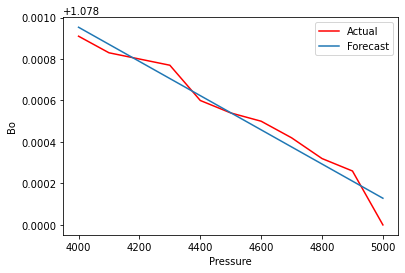

In [52]:
plt.plot(p, b, color='red', label='Actual')
plt.plot(p_forecast, b_forecast, label='Forecast')

plt.xlabel('Pressure')
plt.ylabel('Bo')
plt.legend()

In [63]:
# New Bo Values
b_forecast

array([1.07812864, 1.07821109, 1.07829355, 1.078376  , 1.07845845,
       1.07854091, 1.07862336, 1.07870582, 1.07878827, 1.07887073,
       1.07895318])

In [64]:
df

,Pressure,Bo,Prod_GOR
0,5000,1.078129,112
1,4900,1.078211,112
2,4800,1.078294,112
3,4700,1.078376,112
4,4600,1.078458,112
5,4500,1.078541,112
6,4400,1.078623,112
7,4300,1.078706,112
8,4200,1.078788,112
9,4100,1.078871,112


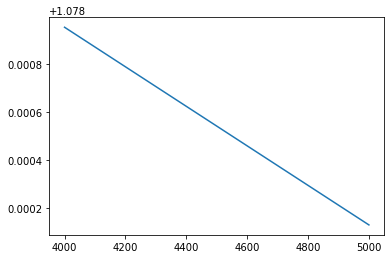

In [65]:
plt.plot(df['Pressure'],df['Bo'])

In [ ]:
#N = OIIP 
#N = 38.8 MMSTB
#Bo = Oil FVF
#Boi = Initial Oil FVF
#Np = N*(Bo-Boi)/Bo
#Rp = SCF/STB


In [95]:
Np=[]
for i in range(0,11):
    if b_forecast[i] == b_forecast[0]:
        np1= 38.8
        Np.append(np1)
    else:
        np= 38.8*(b_forecast[i] - b_forecast[0])/(b_forecast[i])
        Np.append(np)
        
        
        

In [97]:
df['Np']= Np

In [104]:
Gp=[]
for i in range(0,11):
    gp = Np[i]*112
    Gp.append(gp)

In [106]:
df['Gp']= Gp

In [107]:
df

,Pressure,Bo,Prod_GOR,Np,Gp
0,5000,1.078129,112,38.800000,4345.600000
1,4900,1.078211,112,0.002967,0.332323
2,4800,1.078294,112,0.005934,0.664595
3,4700,1.078376,112,0.008900,0.996817
4,4600,1.078458,112,0.011866,1.328988
5,4500,1.078541,112,0.014831,1.661107
6,4400,1.078623,112,0.017796,1.993176
7,4300,1.078706,112,0.020761,2.325195
8,4200,1.078788,112,0.023725,2.657162
9,4100,1.078871,112,0.026688,2.989079


In [110]:
Np1=[]
for i in range(0,11):
        np= 38.8*(b_forecast[i] - b_forecast[0])/(b_forecast[i])
        Np1.append(np)
        

In [111]:
Np1

[0.0,
 0.002967170533742074,
 0.005933887282548701,
 0.008900150350503497,
 0.011865959841682205,
 0.01483131586010478,
 0.017796218509767366,
 0.020760667894626317,
 0.023724664118630154,
 0.026688207285671676,
 0.0296512974996199]

In [117]:
Gp1=[]
for i in range(0,11):
    gp = Np1[i]*112
    Gp1.append(gp)

In [118]:
df['Gp1'] = Gp1

In [112]:
df['Np1']= Np1

In [119]:
df

,Pressure,Bo,Prod_GOR,Np,Gp,Np1,Gp1
0,5000,1.078129,112,38.800000,4345.600000,0.000000,0.000000
1,4900,1.078211,112,0.002967,0.332323,0.002967,0.332323
2,4800,1.078294,112,0.005934,0.664595,0.005934,0.664595
3,4700,1.078376,112,0.008900,0.996817,0.008900,0.996817
4,4600,1.078458,112,0.011866,1.328988,0.011866,1.328988
5,4500,1.078541,112,0.014831,1.661107,0.014831,1.661107
6,4400,1.078623,112,0.017796,1.993176,0.017796,1.993176
7,4300,1.078706,112,0.020761,2.325195,0.020761,2.325195
8,4200,1.078788,112,0.023725,2.657162,0.023725,2.657162
9,4100,1.078871,112,0.026688,2.989079,0.026688,2.989079


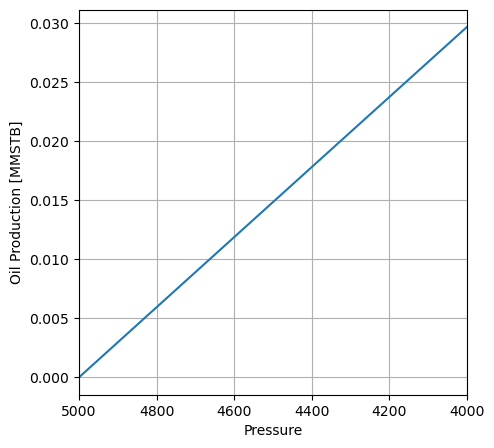

In [154]:
plt.figure(figsize=(5,5))
plt.plot(df['Pressure'],df['Np1'])
plt.xlim(max(df['Pressure']),min(df['Pressure']))
plt.xlabel('Pressure')
plt.ylabel('Oil Production [MMSTB]')
plt.grid()


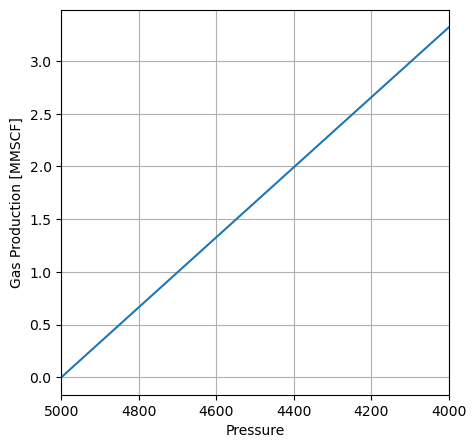

In [155]:
plt.figure(figsize=(5,5))
plt.plot(df['Pressure'],df['Gp1'])
plt.xlim(max(df['Pressure']),min(df['Pressure']))
plt.xlabel('Pressure')
plt.ylabel('Gas Production [MMSCF]')
plt.grid()


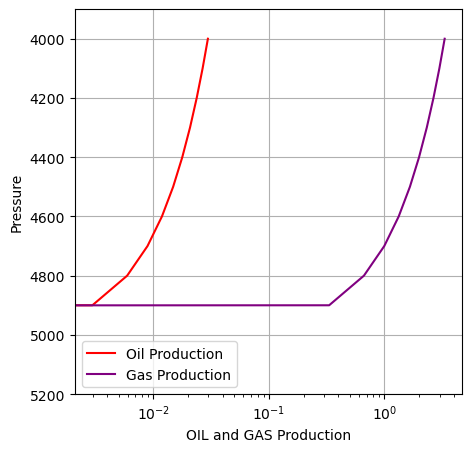

In [146]:
plt.figure(figsize=(5,5))
plt.style.use('default')
plt.semilogx(df['Np1'],df['Pressure'],color='r',label='Oil Production')
plt.semilogx(df['Gp1'],df['Pressure'],color='purple',label='Gas Production')
plt.grid()
plt.xlabel('OIL and GAS Production')
plt.ylabel('Pressure')
plt.ylim(5200,3900)
plt.legend(loc='best')